<a href="https://colab.research.google.com/github/ErisonBarros/Basico_Python.github.io/blob/erison.barros/Lear_arquivo_kmlpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
![]<https://medium.com/data-hackers/criando-mapas-interativos-e-choropleth-maps-com-folium-em-python-abffae63bbd6>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `[]<https://medium.com/data-hackers/criando-mapas-interativos-e-choropleth-maps-com-folium-em-python-abffae63bbd6>'


https://www.youtube.com/watch?v=EElW-W0GmrA

https://python-visualization.github.io/folium/quickstart.html

```
# Isto está formatado como código
https://python-visualization.github.io/folium/quickstart.html
```



## INSTALAÇÃO  DA BIBLIOTECA

In [ ]:
pip install geopandas


     |████████████████████████████████| 994 kB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 16.0 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 


In [ ]:
pip install shapely

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd

# Importar KML

In [1]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
meu_mapa = gpd.read_file('/content/LS7_Pedro.kml', driver='KML')
meu_mapa

NameError: ignored

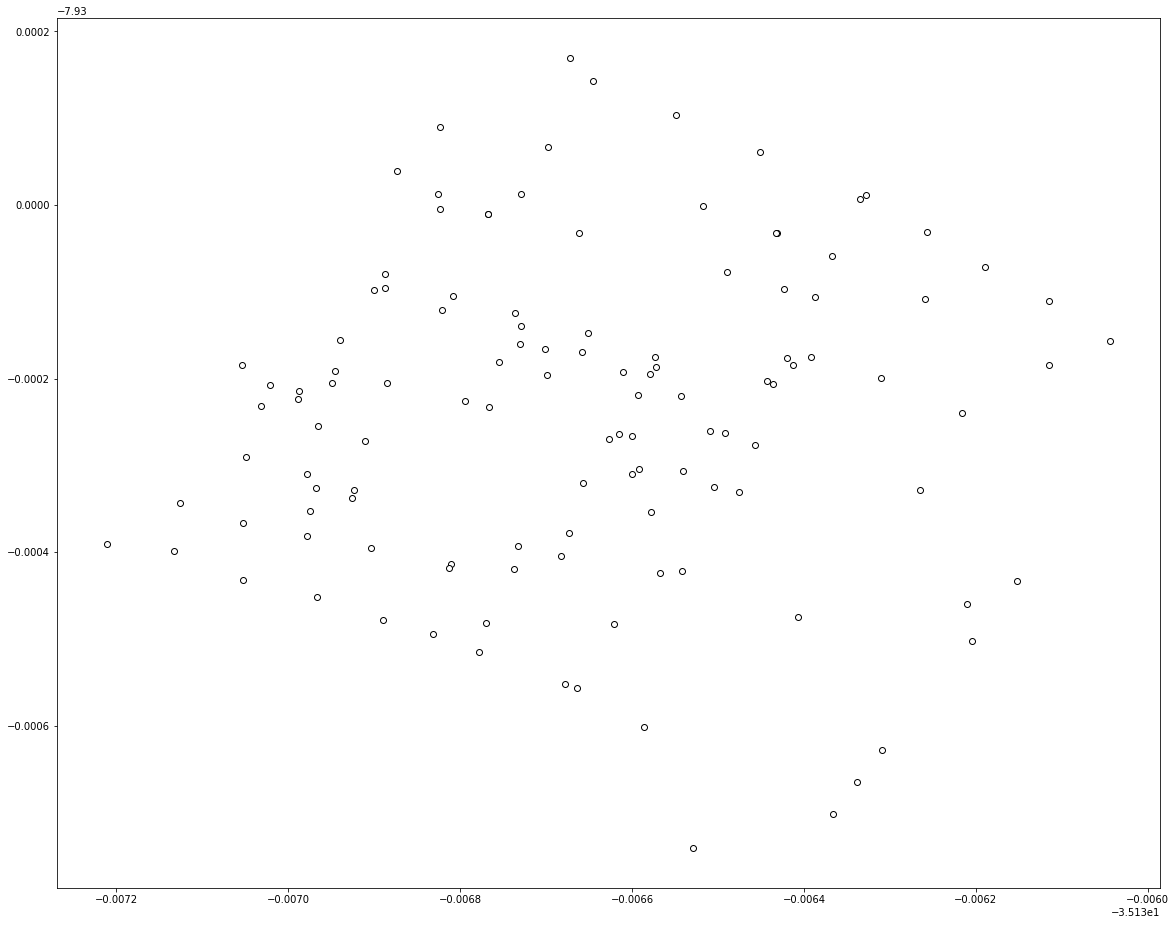

In [ ]:
meu_mapa.plot(color='white', edgecolor='black', figsize=(20,16))

# Crie o mapa com a localidade de seu interesse.

In [ ]:
import folium

In [ ]:
m = folium.Map(location=[-7.93035,-35.13658 ], zoom_start=11)
m

In [ ]:
m = folium.Map(location=[-7.93035,-35.13658 ], zoom_start=11)
# Depois adicionamos o marcador.
folium.Marker(location=[-7.93035,-35.13658 ],
              popup='<i>pontos</i>',
              icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)
m

# Mudando o tipo de gráfico

In [ ]:
m = folium.Map(location=[-7.87883,-34.94763],
               zoom_start=11, tiles= 'Stamen Toner')
m

# Tipo de Dados

In [ ]:
type(meu_mapa)


geopandas.geodataframe.GeoDataFrame

In [ ]:
meu_mapa.plot

# Plotar os Mapas

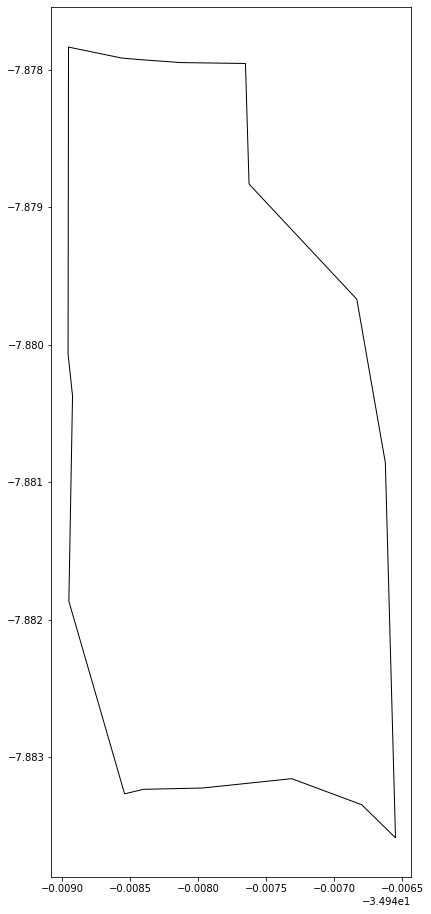

In [ ]:
meu_mapa.plot(color='white', edgecolor='black', figsize=(20,16))

# **Pontos Localização**

Para ler o dataset de pontos com localizações de latitude e longitude, utilize o Pandas:

In [ ]:
localizacoes = pd.read_csv('localizacoes.csv')
localizacoes

O bom e velho tratamento dos dados

In [ ]:
pontos_geometricos = []
for xy in zip(localizacoes['longitude'], localizacoes['latitude']):
    pontos_geometricos.append(Point(xy))

In [ ]:
localizacoes_geo = gpd.GeoDataFrame(localizacoes,
                                    crs = {'init': 'epsg:4326'},
                                    geometry = pontos_geometricos)

Visualizando o KML e o dataset com o Folium!

In [ ]:
import folium
fig = folium.Map(width=900, height=600)

In [ ]:
import json

In [ ]:
geo_json_mapa = json.load(open('/content/Denilson_13ha_1.geojson'))
folium.Choropleth(
    geo_data = geo_json_mapa,
    fill_color = "steelblue",
    fill_opacity = 0.4,
    line_color = "steelblue",
    line_opacity = 0.9
).add_to(fig)
fig


NameError: ignored

In [ ]:
pontos = localizacoes_geo[['latitude', 'longitude']].values.tolist()
for point in range(0, len(pontos)):
    folium.Marker(locationlist[point]).add_to(fig)
fig

# Primeiro criamos o objeto m para o mapa

In [ ]:
m = folium.Map(location=[-7.87883,-34.94763 ], zoom_start=11)
# Depois adicionamos o marcador.
folium.Marker(location=[-7.87883,-34.94763],
              popup='pontos',
              icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)
m

In [ ]:
# Primeiro criamos o objeto m para o mapa
m = folium.Map(location=[-7.87883,-34.94763 ], zoom_start=14)
# Adicionando o marcador circular
folium.CircleMarker(
    location=[-7.87883,-34.94763 ],
    radius=50,
    popup='Esplanada dos Ministerios',
    color='blue',
    fill=True,
    fill_color='lightblue'
).add_to(m)

m

Ainda podemos deixar o próprio usuário inserir o marcador no ponto de interesse, usando o código a seguir.

In [ ]:
# Criando o objeto m para o mapa
m = folium.Map(location=[-7.87883,-34.94763], zoom_start=14)
m.add_child(folium.ClickForMarker(popup='Adicionado pelo Usuario'))

In [ ]:
pip install fastkml

     |████████████████████████████████| 66 kB 2.0 MB/s 
  Created wheel for fastkml: filename=fastkml-0.11-py3-none-any.whl size=61864 sha256=9c2d8b9caf9bb13b047627ba776dc2d2451b598b189994983747f6ef6b8f6506
  Stored in directory: /root/.cache/pip/wheels/40/5b/cc/f1e6b46274d5ebe229555ffd2e2cdbd0cf9781a2acea9ae005
  Created wheel for pygeoif: filename=pygeoif-0.7-py3-none-any.whl size=19248 sha256=7fe93006cab8b35060a0379be8e4d53c71e4f5b413c00989597c9326166ce37b
  Stored in directory: /root/.cache/pip/wheels/4a/84/19/a1fcaf92f8f57a424eca18e2d8c03d149436806b91474bcb89
Successfully built fastkml pygeoif


In [ ]:
from fastkml.kml import KML

def read_kml(fname='/content/CARPINA _ESTUDO DE 800 M2.kml'):
    kml = KML()
    kml.from_string(open(fname).read())
    points = dict()
    for feature in kml.features():
        for placemark in feature.features():
            if placemark.styleUrl.startswith('#hf'):
                points.update({placemark.name:
                            (placemark.geometry.y, placemark.geometry.x, )})
    return points

Then create a dictionary with data information.

In [ ]:
fname = '/content/LS7_Pedro.kml'
fname

'/content/LS7_Pedro.kml'

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
meu_mapa = gpd.read_file('/content/Denilson 13ha (1).kml', driver='KML')
meu_mapa

Concluindo a checagem!

In [ ]:
print("Pontos dentro da região KML: ", sum(localizacoes_geo.pertence_ao_mapa == True))
print("Pontos fora da região KML: ", sum(localizacoes_geo.pertence_ao_mapa == False))